# **Jamboree Business Case Study**  (By Dinesh Prabhu B )
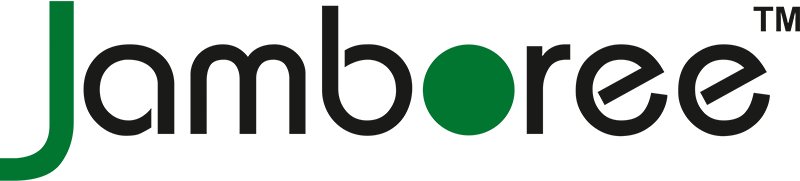

###**About**:                                                          
Jambore is an Educational institute it assists the students in achieving Top score in standardised tests like **GMAT**,**GRE**,**SAT**. It has recently introduced a new feature aimed at estimating the probability of getting admission into **IVY League colleges** for indian students,
IVY League colleges are group of 8 private research universities in Northeastern United states that are known for thier academic excellence and prestigious reputation  


###     **Objective**:
The Objective of this case study is to conduct an Exploratory Data Analysis and Build a predictive model using Linear regression to understand the key factors influencing graduate admissions and Provide actionable insights to jamboree. this  analysis Aims to Offer the recommendations on how jamboree can leverage this information to enhance their services and better assists students in achieving their academic goals



In [1]:
#Importing the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro  #for normality check

In [2]:
#Creating a Data frame
df=pd.read_csv('/content/drive/MyDrive/Pandas Practice data sets/Jamboree_Admission.csv')

In [3]:
#Fetching the first 5 records from the Data Frame
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Observation**

the Data Frame is a long format data  with 500 rows and  9 columns


In [4]:
#Shape of the data
df.shape

(500, 9)

**Information about the data**


In [5]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


**Observation**
1. There are no missing values in any of the columns (all columns have 500 non-null entries) which indicates that it is a clean data set
2. The memory usage of the dataset is 35.3 KB which is relatively small

**Null Values check**


In [6]:
#Secondary check
#Checking for presense of null values
df.isna().sum().sum()

0

**Observation**

There are no Null values present in the dataset

**Statistical Summary of the data**



In [7]:
#Statistical Summary of the data
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Observation**

The descriptive overview of the numerical data looks good but to further investigtion need to be done to confirm the presense of Outliers in the data

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

## **Univariate Analysis**

### **Box Plot for all the numerical columns**

**Observation**

1.There is presence of outliers in the LOR and Chance of admit columns

futher investigation is needed to treate these outliers

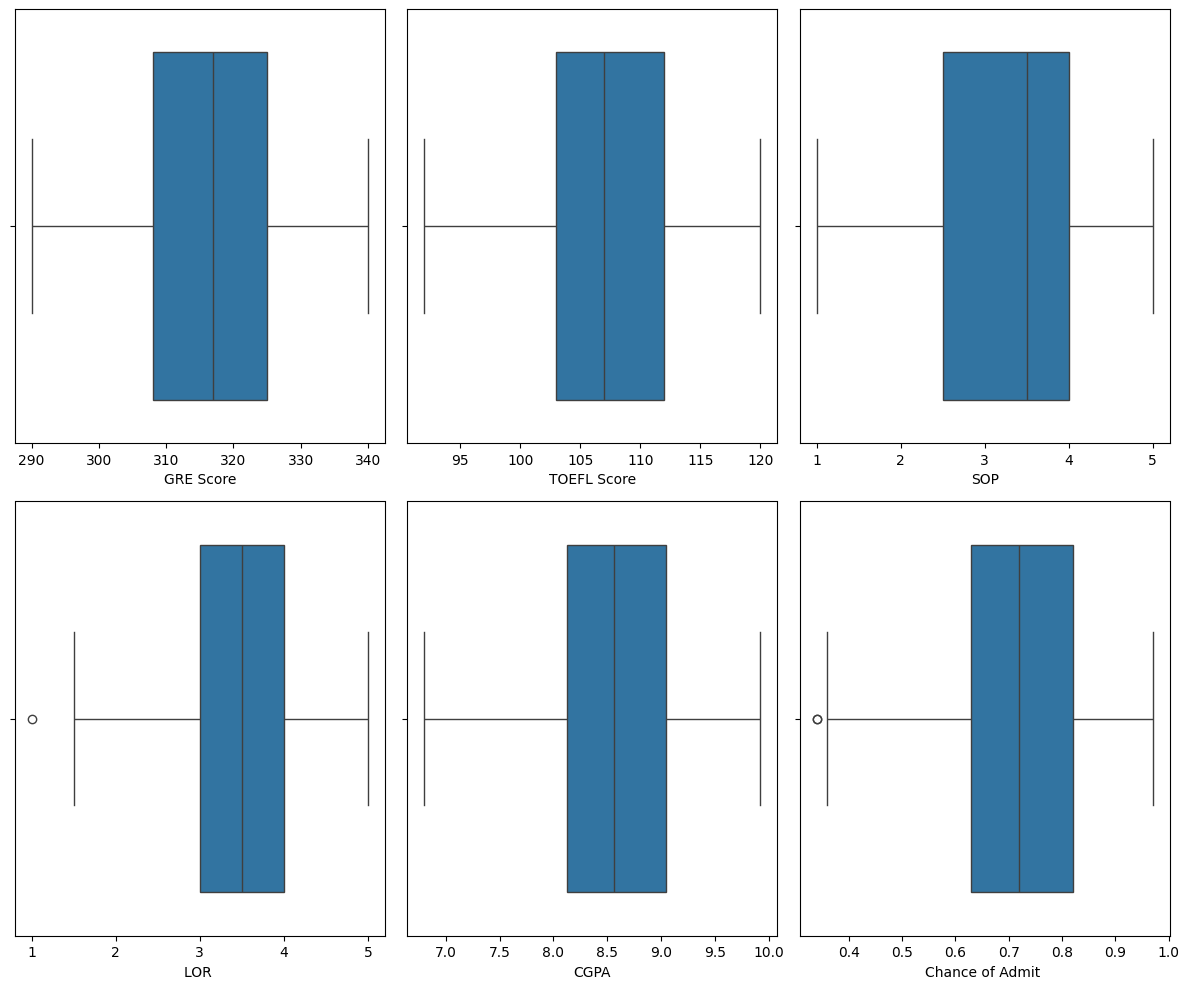

In [9]:
numerical_columns=df.select_dtypes(include=['number']).drop(columns=['Serial No.','Research','University Rating'])

#set the figure size
plt.figure(figsize=(12,10))

#iterate over the numerical columns

for i,column in enumerate(numerical_columns.columns,1):
  plt.subplot(2,3,i)
  sns.boxplot(data=df,x=column)
plt.tight_layout()
plt.show()

### **Histogram**

**Observation**
1. Not all the Distributions are normally distributed
2. Distribution of CGPA scores Looks symmetric with mean value of 8.5 CGPA
   
   further investigation is needed to confirm the normality of CGPA scores


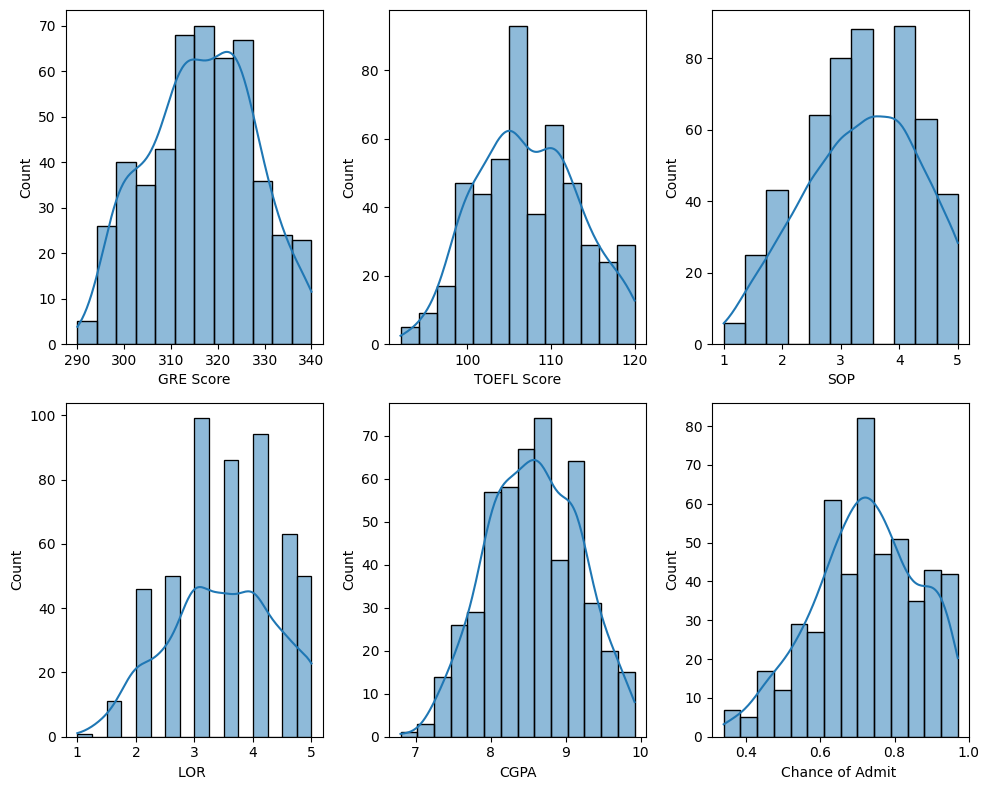

In [10]:
#lets see the distribution of CGPA scores
plt.figure(figsize=(10,8))

for i,column in enumerate(numerical_columns.columns,1):
  plt.subplot(2,3,i)
  sns.histplot(data=df,x=column,kde=True)
plt.tight_layout()
plt.show()

**Statistical Testing**

In [11]:
# Null Hypothesis H0: the distribution is normal
# Alternate Hypothesis Ha: the distribution is not normal

stat,p=shapiro(df['CGPA'])
print(" Statistic:",stat,"\n","P_value:",p)

if p<0.05:
  print(' Reject Null hypothesis: The distribution is not normal')
else:
  print(' Fail t reject Null hypothesis: We Assume that the distribution is normal')

 Statistic: 0.9922108054161072 
 P_value: 0.010292120277881622
 Reject Null hypothesis: The distribution is not normal


### **Pie Chart** (to understand the propotion of college ratings)

**Observation**

Only 6.8 % of colleges were rated as 1,Almost 33% of colleges were rated as 3



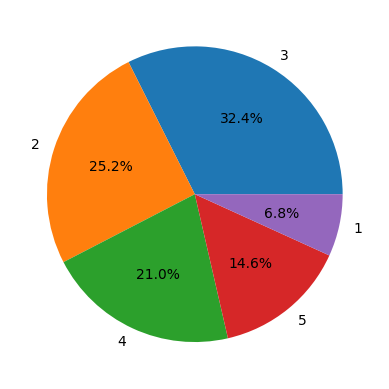

In [12]:
value_counts=df['University Rating'].value_counts()
plt.pie(value_counts,labels=value_counts.index,autopct="%1.1f%%")
plt.show()

## **Bivariate Analysis**

### **Scatter Plot**
1. The relationship between the CGPA Scores and Chance of Admission is positive
2. Both these values are linearly related

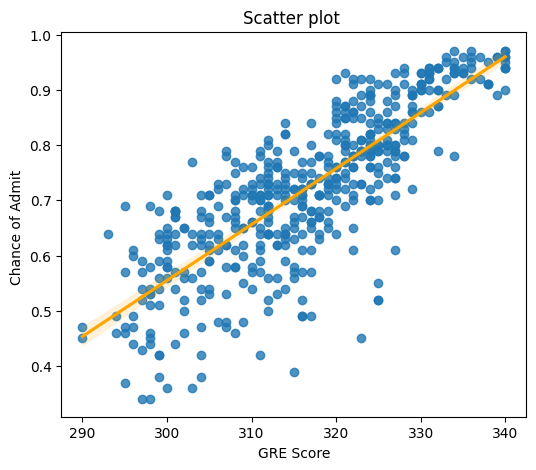

In [13]:
plt.figure(figsize=(6,5))
# sns.scatterplot(data=df, x='GRE Score', y='Chance of Admit ', palette='viridis',hue='University Rating')
sns.regplot(data=df,x='GRE Score',y='Chance of Admit ',line_kws={'color':'orange'})
plt.title('Scatter plot ')
plt.show()

**Observation**

The data poits are Scattered around the trend line hence the **linear** **relation is confirmed**

### **Heat Map**

**Observations**

1. **CGPA - Chance of Admin**--(highest correlation)  which indicates that

     students with high CGPA tend to have high chances of getting Admission
2. GRE Score - Chance of Admit and TOFEL Score -Chance of Admit also have good correlation (makes sense)
3. LOR(Letter of recommendation)- Research Has positive but relatively weak which means LOR and Research are independent factors that contribute differently to the admission process there are other factors that strongly influence the Applicaiton process
4. it is observed that GRE and TOFEL scores were redundent hence dropping one of these columns

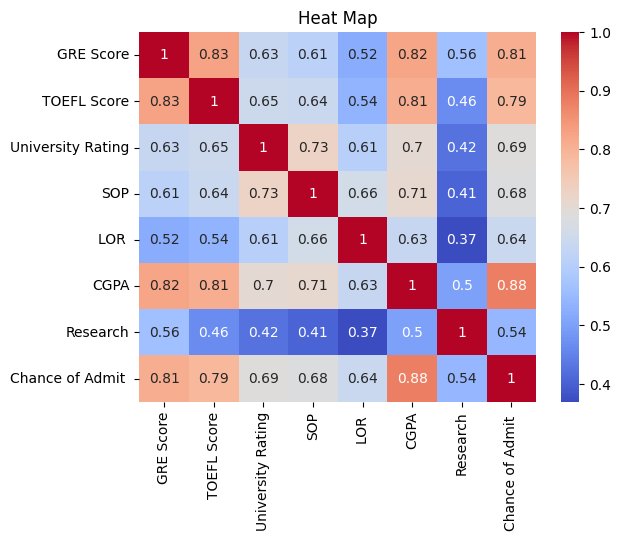

In [23]:
df2=df.drop(columns='Serial No.')
correlation=df2.corr()
sns.heatmap(correlation,annot=True,cmap ='coolwarm')
plt.title('Heat Map')
plt.show()

## **2. Data Preprocessing**



#### **Duplicate Values Check**


**Observation**

The data set does not contain any duplidate rows

In [15]:
df.duplicated().sum()

0

#### **Missing Values Treatment**

**Observation**

The data set does not contain any missing values

In [16]:
df.isnull().sum().sum()

0

#### **Outier Treatment**



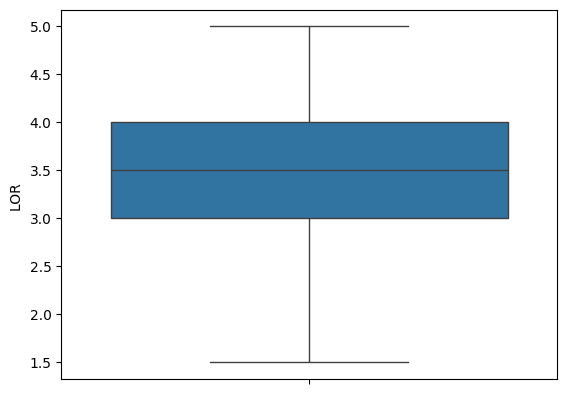

In [24]:
sns.boxplot(df['LOR '])
plt.show()

In [18]:
#using IQR method
Q1,Q3=df['LOR '].quantile([0.25,0.75])

IQR=Q3-Q1

#Finding lower and upper limits

UL=Q3+1.5*IQR
LL=Q1-1.5*IQR

#empty list for outliers

outlier_values=[]

#iterating over the column to fetch outliers
for x in df['LOR ']:
  if ((x>UL) or (x<LL)):
    outlier_values.append(x)
print(outlier_values)

[1.0]


In [19]:
#Assigning Nan value to outlier data
df['LOR '].values[df['LOR ']>UL]=np.nan
df['LOR '].values[df['LOR ']<LL]=np.nan

df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  1
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [20]:
#removing outliers
df.dropna(inplace=True)

In [21]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

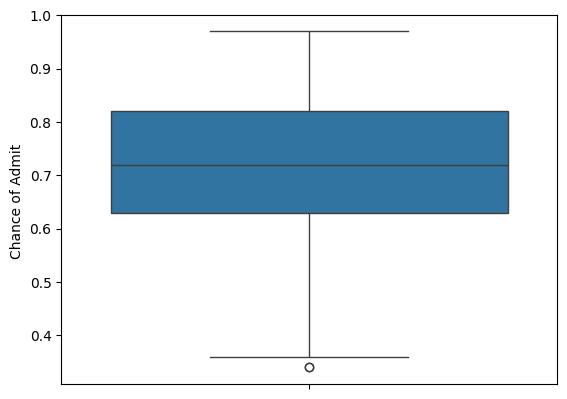

In [25]:
sns.boxplot(df['Chance of Admit '])
plt.show()

**using IQR(Inter Quartile Range) method for Outliers treatment**

In [ ]:

Q1,Q3=df['LOR '].quantile([0.25,0.75]) # fetching 25th and 75th quartile values

IQR=Q3-Q1    #IQR calculation

#Finding lower and upper limits

UL=Q3+1.5*IQR   #Upper Bound
LL=Q1-1.5*IQR   #Lower Bound

#Creating an empty list for filling outliers

outlier_values=[]

#iterating over the column to fetch outliers
for x in df['LOR ']:
  if ((x>UL) or (x<LL)):
    outlier_values.append(x)

#Assigning Nan value to outlier data
df['LOR '].values[df['LOR ']>UL]=np.nan
df['LOR '].values[df['LOR ']<LL]=np.nan
#removing outliers
df.dropna(inplace=True)
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### **Preparing the data for Linear regression**

In [ ]:
y=df['Chance of Admit ']  #Target variable
X=df.drop(['Chance of Admit ','Serial No.'],axis=1)  #Features
y.shape,X.shape

((499,), (499, 7))

**Data Split**

In [ ]:
#importing train_test_split function to split the data into Train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
X_train #Training data(features/ independent variables)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
230,313,104,3,4.0,4.5,8.65,0
205,295,99,2,2.5,3.0,7.65,0
298,330,114,3,4.5,4.5,9.24,1
425,323,111,5,4.0,5.0,9.86,1
444,324,113,5,4.0,5.0,9.25,1
...,...,...,...,...,...,...,...
493,300,95,2,3.0,1.5,8.22,1
88,314,108,3,4.5,3.5,8.14,0
446,327,118,4,5.0,5.0,9.67,1
474,308,105,4,3.0,2.5,7.95,1


In [ ]:
y_train #Training data( Target/dependent variable)

230    0.73
205    0.57
298    0.90
425    0.92
444    0.92
       ... 
493    0.62
88     0.64
446    0.93
474    0.67
151    0.94
Name: Chance of Admit , Length: 399, dtype: float64

### **Feature Scaling**
Scaling the Numerical features to normal range to avoid bias towards the features with high values

In [ ]:
#Standardization
from sklearn.preprocessing import StandardScaler
X_train_columns=X_train.columns
std=StandardScaler()  #Creating an object of standard scaler
X_train_std=std.fit_transform(X_train) # fitting the training data

In [ ]:
X_train_std #After standardization

array([[-0.32583927, -0.53899147, -0.13050096, ...,  1.03504856,
         0.07631103, -1.14296036],
       [-1.91888053, -1.35175639, -1.01304131, ..., -0.58874322,
        -1.58479656, -1.14296036],
       [ 1.1786997 ,  1.08653837, -0.13050096, ...,  1.03504856,
         1.05636451,  0.87492098],
       ...,
       [ 0.91319283,  1.7367503 ,  0.7520394 , ...,  1.57631248,
         1.77064077,  0.87492098],
       [-0.76835073, -0.37643849,  0.7520394 , ..., -1.13000714,
        -1.08646428,  0.87492098],
       [ 1.35570429,  1.41164434,  1.63457976, ...,  1.57631248,
         1.12280881,  0.87492098]])

In [ ]:
#converting Xtrain to dataframe
X_train=pd.DataFrame(X_train_std,columns=X_train_columns)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-0.325839,-0.538991,-0.130501,0.584985,1.035049,0.076311,-1.142960
1,-1.918881,-1.351756,-1.013041,-0.943894,-0.588743,-1.584797,-1.142960
2,1.178700,1.086538,-0.130501,1.094611,1.035049,1.056365,0.874921
3,0.559184,0.598879,1.634580,0.584985,1.576312,2.086251,0.874921
4,0.647686,0.923985,1.634580,0.584985,1.576312,1.072976,0.874921
...,...,...,...,...,...,...,...
394,-1.476369,-2.001968,-1.013041,-0.434268,-2.212535,-0.637965,0.874921
395,-0.237337,0.111220,-0.130501,1.094611,-0.047479,-0.770854,-1.142960
396,0.913193,1.736750,0.752039,1.604237,1.576312,1.770641,0.874921
397,-0.768351,-0.376438,0.752039,-0.434268,-1.130007,-1.086464,0.874921


In [ ]:
y_train

230    0.73
205    0.57
298    0.90
425    0.92
444    0.92
       ... 
493    0.62
88     0.64
446    0.93
474    0.67
151    0.94
Name: Chance of Admit , Length: 399, dtype: float64

## Stats Model implementation of Linear Regression

In [ ]:
import statsmodels.api as sm
#Adding an additonal column which contributes to intercept (W0)
X_train=sm.add_constant(X_train)
#creating a model using Ordinary least square method(OLS)
model=sm.OLS(y_train.values,X_train)
model=model.fit()
#summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     276.3
Date:                Wed, 01 May 2024   Prob (F-statistic):          4.41e-147
Time:                        10:56:33   Log-Likelihood:                 574.30
No. Observations:                 399   AIC:                            -1133.
Df Residuals:                     391   BIC:                            -1101.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7286      0.00

**Observations**
1. The value of  R^2 and R^2_Adjusted are almost same which indicates that  all feature are relevant
2. F_statistic is 276.3 and Prob (F-statistic): 4.41e-147

  Eqn. of Regression line: Y(predicted)= W0+W*f1+W2*f2+.....+Wdfd
  
    **H0 (null hypothesis):**      
  
  Y(predicted) = W0 (simple model) & Weights =0
  
  **Ha (Alternate Hypothesis):**
  
  Y(predicted) is a not a simple model & Weigts !=0
   
  since Prob (F-statistic): 4.50e-146 < 0.05 we reject the null hypothesis hence we have statistically significant proof that weigts are  not zero

3. **CGPA** feature has got highest weight among all the features i.e Most important feature

4. **SOP** feature has got highes p_value lets remove SOP feature and check the model statistics



In [ ]:
X_train_new=X_train.drop(columns='SOP') #Dropping SOP feature
X_train_new.columns

Index(['const', 'GRE Score', 'TOEFL Score', 'University Rating', 'LOR ',
       'CGPA', 'Research'],
      dtype='object')

In [ ]:
model2=sm.OLS(y_train.values,X_train_new).fit() #rebuilding the model
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     323.0
Date:                Wed, 01 May 2024   Prob (F-statistic):          2.65e-148
Time:                        10:56:33   Log-Likelihood:                 574.18
No. Observations:                 399   AIC:                            -1134.
Df Residuals:                     392   BIC:                            -1106.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7286      0.00

**Observations**

1. removing SOP feature has no effect on  R^2 and R^2 Adjusted values


### **Testing the Assumptions of Linear Regression**

1. **Multicollinearity**

In [ ]:
#VIF ( Variance inflation factor)-Method
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset,col):
  dataset=dataset.drop(columns=col,axis=1)
  vif=pd.DataFrame()
  vif['Features']=dataset.columns
  vif['VIF_value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
  return vif

In [ ]:
calculate_vif(X_train_new,[])  #we can neglect the vif of constant

,Features,VIF_value
0,const,1.000000
1,GRE Score,4.804324
2,TOEFL Score,3.989888
3,University Rating,2.525085
4,LOR,1.849139
5,CGPA,4.651952
6,Research,1.454834


### Testing the model

In [ ]:
X_test_std=std.transform(X_test) #Transforming the test data to right format
                                 # The result will be in array format

In [ ]:
#converting transformed X_test_adj to dataframe
X_test=pd.DataFrame(X_test_std,columns=X_test.columns)
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.267202,1.411644,1.634580,0.584985,0.493785,1.089587,0.874921
1,-2.361392,-0.538991,0.752039,-1.453521,-1.130007,-1.900407,-1.142960
2,-1.741876,-1.514309,-1.013041,-0.943894,-0.588743,-1.551574,-1.142960
3,0.736188,0.761432,0.752039,0.584985,0.493785,0.657699,0.874921
4,-0.060332,-0.376438,-1.013041,-0.943894,-1.130007,-0.671187,0.874921
...,...,...,...,...,...,...,...
95,-0.945355,-0.701544,-0.130501,0.075358,-0.588743,-0.654576,-1.142960
96,1.090197,0.598879,0.752039,1.094611,0.493785,1.039753,0.874921
97,0.382179,0.598879,-0.130501,0.075358,0.493785,0.375310,0.874921
98,0.116672,0.436326,-1.895582,-0.943894,-0.047479,-0.106411,0.874921


In [ ]:
X_test=sm.add_constant(X_test) #adding constant term

In [ ]:
#Matching columns in test dataset with train dataset
X_test_del_col=list(set(X_test.columns).difference(set(X_train_new.columns)))

In [ ]:
print("Dropping {} from the test data set".format(X_test_del_col))

Dropping ['SOP'] from the test data set


In [ ]:
X_test=X_test.drop(columns=X_test_del_col)

In [ ]:
#Model Prediction
Prediction=model2.predict(X_test)


In [ ]:
#checking the perormance of the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

print('Mean Absolute Error:', mean_absolute_error(y_test.values,Prediction))

print('Mean Squared Error: ',mean_squared_error(y_test.values,Prediction))


#MAPE-Mean absolute percentage error - tells how far we are from y test
#it returns average absolute percentage error between Y_test data mean and Prediction data mean
print('Mean Absolute percentage error: ',mean_absolute_percentage_error(y_test.values,Prediction))


Mean Absolute Error: 0.05064512500879581
Mean Squared Error:  0.004652745089707682
Mean Absolute percentage error:  0.08339734526144955


### **Mean of residuals**

      should be close to Zero

In [ ]:
residual=y_test.values- Prediction
mean_of_residuals=np.mean(residual)
print("Mean of Residuals: ",mean_of_residuals)

Mean of Residuals:  -0.0070310799576820005


### **Normality of residuals**

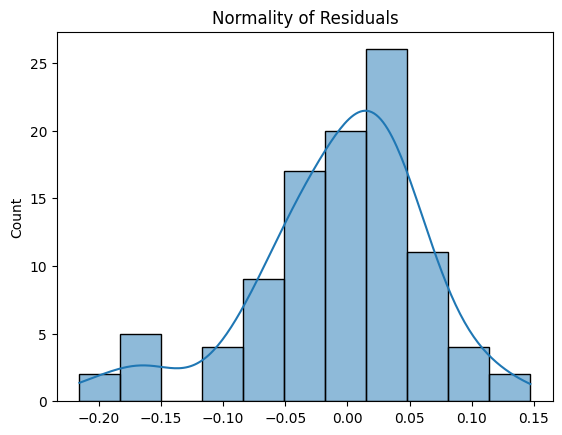

In [ ]:
plt.title('Normality of Residuals')
sns.histplot(residual,kde=True)
plt.show()

**Observation** the Residuals are normally distributed centered around zero

## **HomoScedasticity**

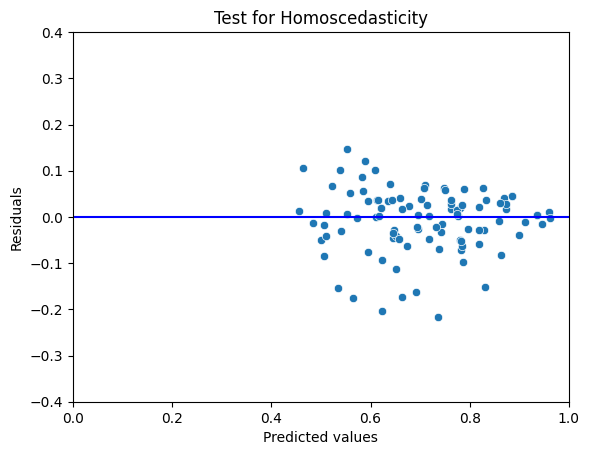

In [ ]:
plt.title('Test for Homoscedasticity')
sns.scatterplot(x=Prediction,y=residual)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.xlim(0,1)
plt.ylim(-0.4,0.4)
plt.axhline(y=0,color='blue',linestyle='-')
plt.show()

**Observation**:

there is no pattern observed from the above scatter plot hence we confirm the absence of Homoscedasticity

#### **Relation Between Expected values(on test data) VS predicted values**

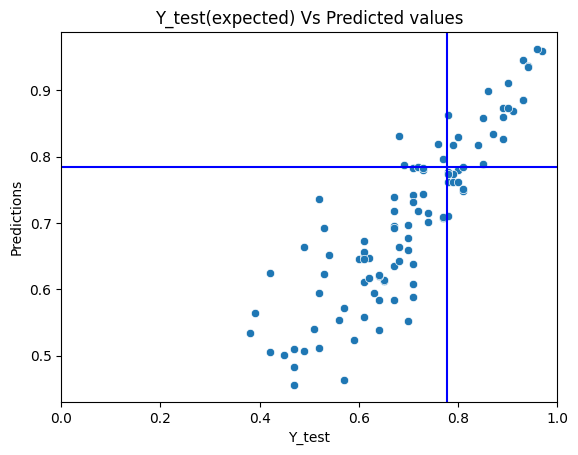

In [ ]:
#Scatterplot
sns.scatterplot(x=y_test.values,y=Prediction)
plt.xlim([0,1])
plt.xlabel('Y_test')
plt.ylabel('Predictions')
plt.title('Y_test(expected) Vs Predicted values')

plt.axvline(x=np.mean(y_test.values)+0.08,color='blue')
plt.axhline(y=np.mean(Prediction.values)+0.08,color='blue')
plt.show()

**Observation**
1. for the values just above mean values of both Y_test and Predicted value the model accuracy is **high**. when the **Chance of admit** is high in our data then the model accuracy is high


## **Recommendations**

1. To impove the Accuracy of the model we need more relevant features
2. We can improve the performace of the model by performing in depth

### **scikit-learn implementation of Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
#for our data target variable is Chance of Admit
#remaining columns are input data
y=df['Chance of Admit ']
X=df.drop(['Chance of Admit ','Serial No.'],axis=1)
X.shape,y.shape

((499, 7), (499,))

**so we have to,**
- predict one output feature
- with the help of 8 features

**Lets split the data**
- 70% of the data is for training
- 30% of data is for testing

In [ ]:
#Separating Test and Train Data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
#applying linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train) #training the data

LinearRegression()

In [ ]:
model.coef_   #weights

array([ 0.00125265,  0.00368069,  0.01023943, -0.00286126,  0.01645992,
        0.1129188 ,  0.0306637 ])

In [ ]:
model.intercept_   #Bias term

-1.132522579560952

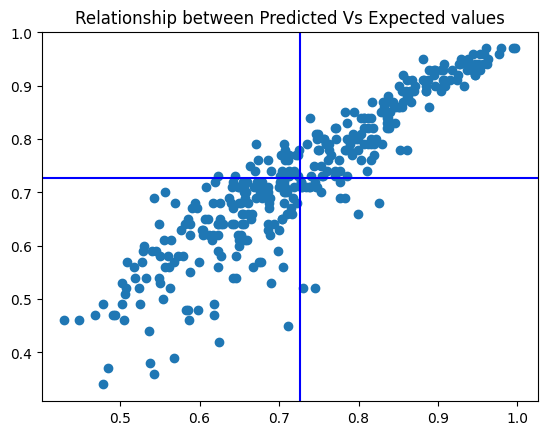

In [ ]:
fig=plt.figure()
y_hat=model.predict(X_train)
plt.scatter(y_hat,y_train)  #predicting on the train data itsself
plt.title('Relationship between Predicted Vs Expected values')

plt.axvline(x=np.mean(y_hat),color='blue')
plt.axhline(y=np.mean(y_train),color='blue')
plt.show()

**Observation**

For the values above mean expected value the model is predicting accurately

In [ ]:
model.score(X_train,y_train)  #R2-Score after prediction
                              #difference between ytrain and y hat train
                              # good score

0.8284562334742129

In [ ]:
model.score(X_test,y_test)  #R2-Score on the testing data
                            #from training to testing R2_score reduced
                            #model is performing well on the train data but not performiing well on the test data
                            #is this the situation of overfitting ?

0.7959612316753433

In [ ]:
model.coef_   #weights

array([ 0.00125265,  0.00368069,  0.01023943, -0.00286126,  0.01645992,
        0.1129188 ,  0.0306637 ])

### **Finding the most imporatant feature**

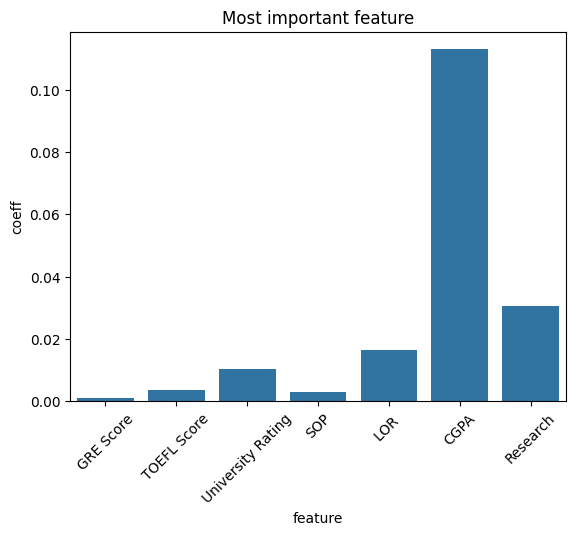

In [ ]:

#feature with maximum weight is most important
imp=pd.DataFrame(list(zip(X_test.columns,np.abs(model.coef_))),columns=['feature','coeff'])
sns.barplot(x='feature',y='coeff',data=imp)
plt.xticks(rotation=45)
plt.title('Most important feature')
plt.show()

**Observation**:
The Most important Feature among all is **CGPA**

## **Recommendations**

1. The most iportant Feature in predicting the chance of Getting admission is **CGPA**

2. The model is performing well at higer values of actual values which indicates that there is bias( simpler model), to avoid this we can improve the complexity of the model or we can add more number of features at low values of expected output to remove the bias
3. The performace metrics MSE (Mean Squared Error), MAE ( Mean Absolute error) are came out be very hence we can reley on the model in predicting the chance of admit


In [ ]:
/content/Jamboree_Education_Linear_Regression.ipynb